In [3]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold

In [10]:
# read the dataset and stored in data dataframe
data = pd.read_csv('titanic.csv')

In [11]:
# Preprocessing  the data
# Drop columns which are not useful.
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values 
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Create a new column 'FamilyMember' as the sum of 'SibSp' and 'Parch'
data['FamilyMember'] = data['SibSp'] + data['Parch'] + 1

#Now , we create another column 'Alone' that is True if size of 'FamilyMembers' is 1
data['Alone'] = data['FamilyMember'] == 1

# Convert categorical variables to numerical variables for training the model easily
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# Drop the  more columns
data = data.drop(['SibSp', 'Parch', 'FamilyMember'], axis=1)
print(data.head())

   Survived  Pclass   Age     Fare  Alone  Sex_female  Sex_male  Embarked_C  \
0         0       3  22.0   7.2500  False           0         1           0   
1         1       1  38.0  71.2833  False           1         0           1   
2         1       3  26.0   7.9250   True           1         0           0   
3         1       1  35.0  53.1000  False           1         0           0   
4         0       3  35.0   8.0500   True           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


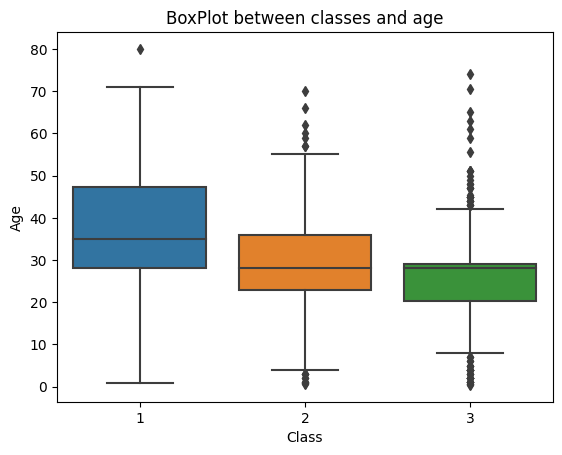

In [12]:
#we show the passengers classes with their ages to get statistical result in visualizing method using boxplot.
sns.boxplot(x="Pclass",y="Age", data=data)

# set the plot title and labels
plt.title('BoxPlot between classes and age')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

<Axes: xlabel='Alone', ylabel='count'>

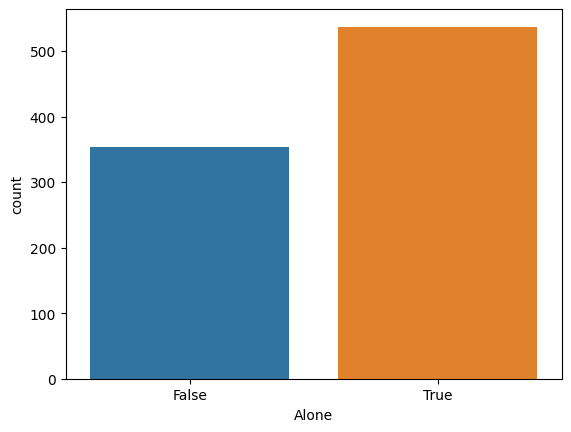

In [13]:
#we plot count plot to count the number of alone persons in the titanic dataset
sns.countplot(x='Alone',data=data)

<Axes: >

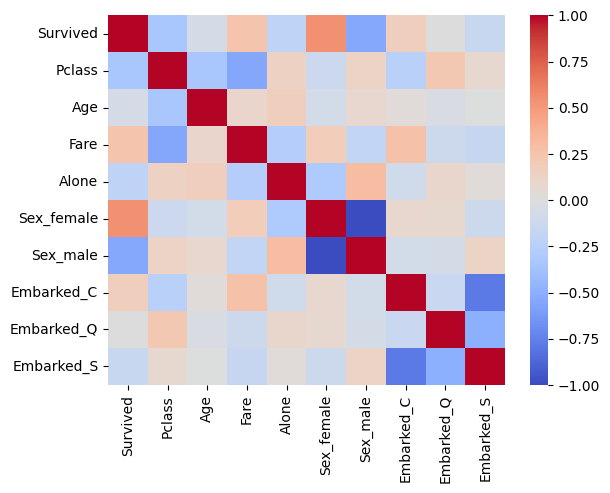

In [14]:
#Now, we check how much data are co related to each other.
cor=data.corr()
sns.heatmap(cor, cmap='coolwarm')

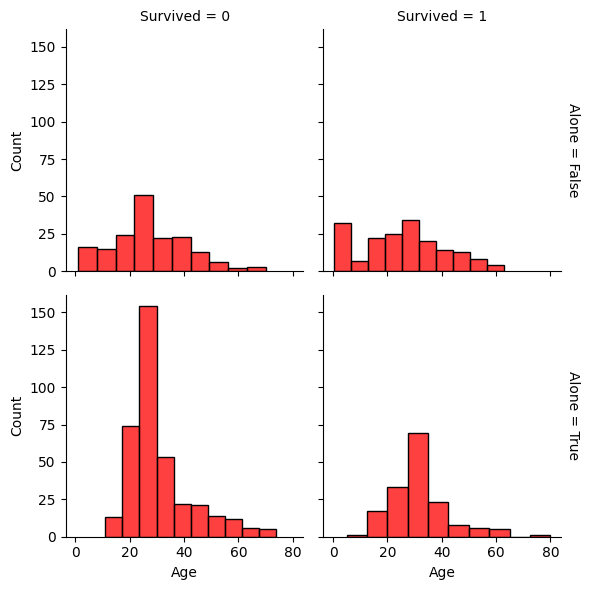

In [15]:
#Now we check that how many person are survived either alone or with family.
g = sns.FacetGrid(data, col="Survived", row="Alone", margin_titles=True)
sns.despine()
# Add a histogram of age for each grid cell
g.map(sns.histplot, "Age", bins=10,color='red')

# Show the plot
sns.despine()

In [16]:
# Split the data into training and testing 
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.355)

In [17]:
# Train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [18]:
# Make predictions on the testing set and evaluate the model using a confusion matrix
y_pred = nb.predict(X_test)
result = confusion_matrix(y_test, y_pred)
print(result)

[[162  26]
 [ 40  89]]


In [19]:
# Now, we show the accuracy, recall, precision and F score or measure of above sets.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1-score: ",fscore)

Accuracy:  0.7917981072555205
Precision:  0.7739130434782608
Recall:  0.689922480620155
F1-score:  0.7295081967213115


In [21]:
# we validate the dataset through cross-validation method

X = data.drop('Survived', axis=1)
y = data['Survived']
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Compute the cross-validation scores for accuracy
scores = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')

# Print the average and standard deviation of the scores
print("Accuracy: ",scores.mean())
print("Standard Devation: ",scores.std())

Accuracy:  0.78
Standard Devation:  0.05063365680168647


In [42]:
# Make predictions on the testing set 
y_pred = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7665615141955836


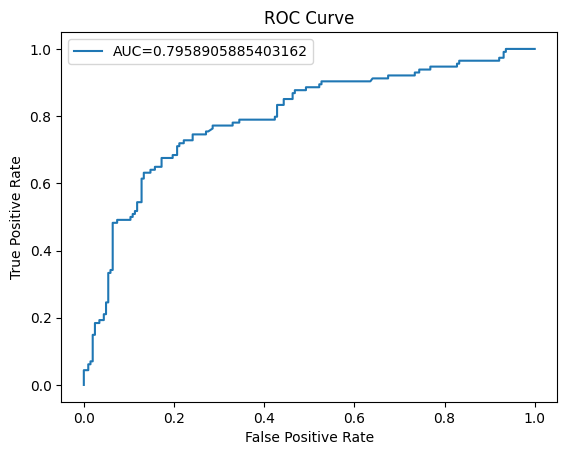

In [20]:
#we plot te ROC curve for Naive Bayes
y_pred_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, treshold = metrics.roc_curve(y_test,  y_pred_nb)
auc = metrics.roc_auc_score(y_test, y_pred_nb)

#create ROC curve
plt.plot(fpr_nb,tpr_nb,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.show()



In [43]:
# Now, we train a decision tree classifier on the training data
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# we make predictions on the testing data
predictions = dtc.predict(X_test)
print(predictions)

[0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0]


In [45]:
# now, we evaluate the accuracy of model
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)


Accuracy: 0.7602523659305994


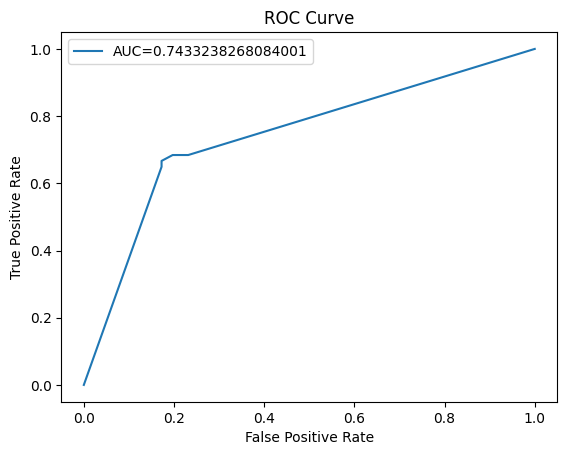

In [25]:
#Now, we show ROC curve for decision tree claaifier
y_pred_dt = dtc.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, treshold = metrics.roc_curve(y_test,  y_pred_dt)
auc = metrics.roc_auc_score(y_test, y_pred_dt)

#create ROC curve
plt.plot(fpr_dt,tpr_dt,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.show()

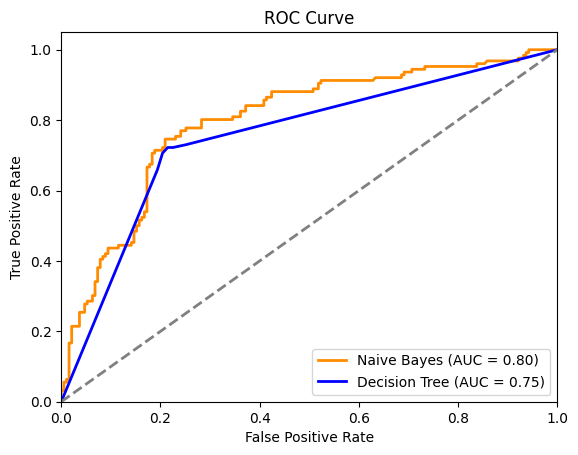

In [48]:


# Now, we compute the area under the ROC curve (AUC) for each model
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# we plot the ROC curves
plt.figure()
lw = 2
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=lw, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()